In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA

data_url = "http://lib.stat.cmu.edu/datasets/boston"
raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])[:, 12:]
data = (data - data.min()) / (data.max() - data.min())

target = raw_df.values[1::2, 2]
target = (target - target.min()) / (target.max() - target.min())

X_train, X_test, y_train, y_test = train_test_split(data, target, test_size=0.33)

In [2]:
import matplotlib.pyplot as plt
import numpy as np


def plot_gpr_samples(gpr_model, ax, title=''):

    x = np.linspace(0, 1, 100)
    X = x.reshape(-1, 1)

    y_mean, y_std = gpr_model.predict(X, return_std=True)
    a = ax.plot(x, y_mean, label="Mean " + title)
    ax.fill_between(
        x,
        y_mean - y_std,
        y_mean + y_std,
        alpha=0.1,
        color=a[0].get_color(),
        label=r"$\pm\sigma$ " + title,
    )
    ax.set_xlabel("x")
    ax.set_ylabel("y")

### Зависимость качества модели от множителя перед ядром.

Чем меньше это значение тем больше дисперсия предсказания.

/home/viacheslav/.local/lib/python3.8/site-packages/sklearn/gaussian_process/kernels.py:402: ConvergenceWarning: The optimal value found for dimension 0 of parameter k2__length_scale is close to the specified lower bound 1e-05. Decreasing the bound and calling fit again may find a better value.
  warnings.warn("The optimal value found for "
/home/viacheslav/.local/lib/python3.8/site-packages/sklearn/gaussian_process/_gpr.py:506: ConvergenceWarning: lbfgs failed to converge (status=2):
ABNORMAL_TERMINATION_IN_LNSRCH.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  _check_optimize_result("lbfgs", opt_res)


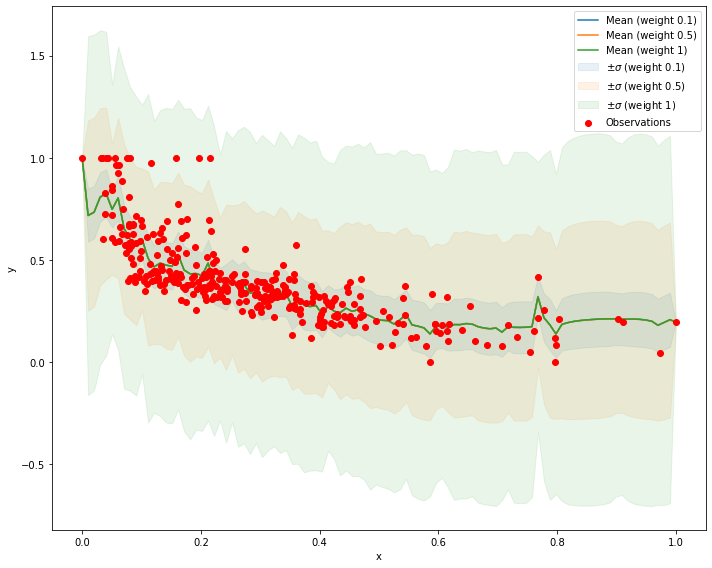

In [7]:
from sklearn.gaussian_process import GaussianProcessRegressor
from sklearn.gaussian_process.kernels import RBF, RationalQuadratic

fig, axs = plt.subplots(nrows=1, sharex=True, sharey=True, figsize=(10, 8))
gpr = GaussianProcessRegressor(kernel=0.1 * RationalQuadratic(), random_state=0)
gpr.fit(X_train, y_train)
plot_gpr_samples(gpr, ax=axs, title='(weight 0.1)')

gpr = GaussianProcessRegressor(kernel=0.5 * RationalQuadratic(), random_state=0)
gpr.fit(X_train, y_train)
plot_gpr_samples(gpr, ax=axs, title='(weight 0.5)')

gpr = GaussianProcessRegressor(kernel=1 * RationalQuadratic(), random_state=0)
gpr.fit(X_train, y_train)
plot_gpr_samples(gpr, ax=axs, title='(weight 1)')

axs.scatter(X_train, y_train, color="red", zorder=10, label="Observations")
axs.legend()
plt.tight_layout()

### Зависимость качества модели от разрешенных "длин" ядра.

При меньших длинах ядра, модель больше переобучается. Это логично, потому что гауссовский процесс начинает смотреть на рядом стоящие данные больше, чем на глобальную структуру.

/home/viacheslav/.local/lib/python3.8/site-packages/sklearn/gaussian_process/kernels.py:402: ConvergenceWarning: The optimal value found for dimension 0 of parameter length_scale is close to the specified lower bound 0.1. Decreasing the bound and calling fit again may find a better value.
  warnings.warn("The optimal value found for "
/home/viacheslav/.local/lib/python3.8/site-packages/sklearn/gaussian_process/kernels.py:402: ConvergenceWarning: The optimal value found for dimension 0 of parameter length_scale is close to the specified lower bound 0.5. Decreasing the bound and calling fit again may find a better value.
  warnings.warn("The optimal value found for "
/home/viacheslav/.local/lib/python3.8/site-packages/sklearn/gaussian_process/kernels.py:402: ConvergenceWarning: The optimal value found for dimension 0 of parameter length_scale is close to the specified lower bound 1.0. Decreasing the bound and calling fit again may find a better value.
  warnings.warn("The optimal value f

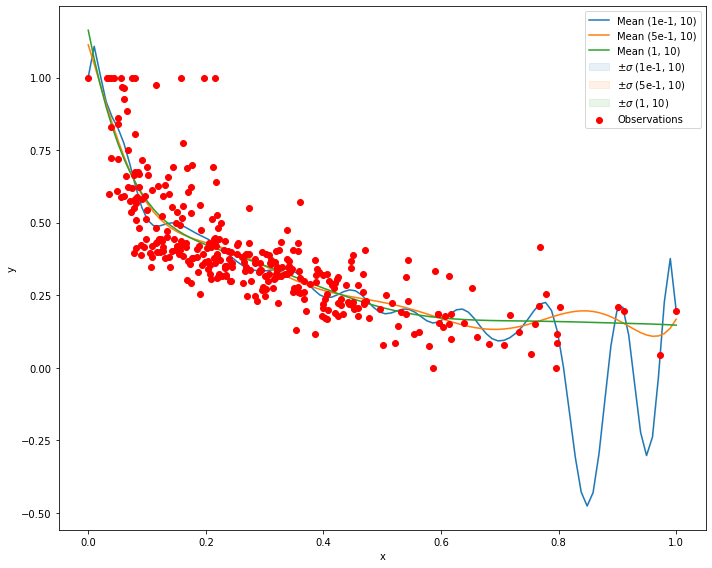

In [4]:
fig, axs = plt.subplots(nrows=1, sharex=True, sharey=True, figsize=(10, 8))

gpr = GaussianProcessRegressor(kernel=RBF(length_scale=1.0, length_scale_bounds=(1e-1, 10.0)), random_state=0)
gpr.fit(X_train, y_train)
plot_gpr_samples(gpr, ax=axs, title='(1e-1, 10)')

gpr = GaussianProcessRegressor(kernel=RBF(length_scale=1.0, length_scale_bounds=(5e-1, 10.0)), random_state=0)
gpr.fit(X_train, y_train)
plot_gpr_samples(gpr, ax=axs, title='(5e-1, 10)')

gpr = GaussianProcessRegressor(kernel=RBF(length_scale=1.0, length_scale_bounds=(1, 10.0)), random_state=0)
gpr.fit(X_train, y_train)
plot_gpr_samples(gpr, ax=axs, title='(1, 10)')

axs.scatter(X_train, y_train, color="red", zorder=10, label="Observations")
axs.legend()
plt.tight_layout()